# HE ENCONTRADO EL FALLO. 

## Resulta que me equicoqué en el código y estaba calculando los residuos y las significancias de los pseudo-experimentos (los que hago para sacar las bandas) con los histogramas normales, no con los acumulados, como había que hacerlo. Ya lo he corregido y ahora todo tiene más sentido.

# Correlación de neutrinos cósmicos con fuentes extragalácticas

In [1]:
import astropy
import astroplan
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import h5py
import scipy.stats
import time
from datetime import timedelta

In [2]:
# Variables de control del programa
SIMULATED = True
SIMULATED2= True

Nexp = 100_000
nexp = 100_000

bins = 200

## Leo los datos de ANTARES

In [3]:
names_antares = []
ra_antares = []
dec_antares = []

with open('PublicData_0717.dat.txt') as f:
    for index, line in enumerate(f):
        # Salto la cabecera
        if index==0:
            continue
        # Divido la line en espacios en blanco
        a = line.split()
        # Guardo los datos
        dec_antares.append(float(a[0])) # deg
        ra_antares.append(float(a[1]))  # deg
        names_antares.append(a[4])
        
# Lo transformo con "astropy coordinates"
antares = astropy.coordinates.SkyCoord(ra_antares, dec_antares, frame='icrs', unit='deg')

## Leo los datos del catálogo

In [4]:
names_cat = []
ra_cat = []
dec_cat = []

with open('rfc_2020d_cat.txt') as f:
    for index, line in enumerate(f):
        # Salto las lineas de cabecera
        if index<135:
            continue
        # Divido la linea por espacios en blanco
        a = line.split()
        # Selecciono las 'galaxias' con emision en x-band > 150 mJy
        x_band = float(a[17])
        dec_cut = float(a[6])
        if x_band >=0.15:
            names_cat.append(a[2])
            ra_cat.append(a[3]+' '+a[4]+' '+a[5])  #  hr mn seconds
            dec_cat.append(a[6]+' '+a[7]+' '+a[8]) # deg mn seconds

# Lo transformo con astropy coordinates
cat = astropy.coordinates.SkyCoord(ra_cat, dec_cat, unit=(astropy.units.hourangle, astropy.units.deg))

## Dibujo las distribuciones

In [5]:
plt.rcParams.update({'font.size': 20, 'font.weight':1000})

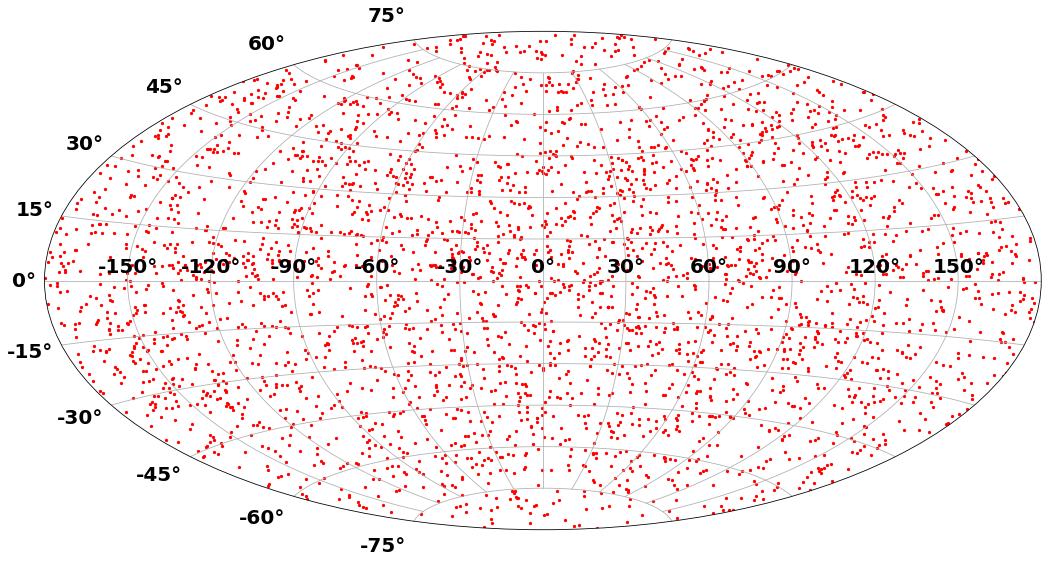

In [6]:
# Catalogo
plt.close('all')
plt.figure(figsize=(15,8))

plt.subplot(projection='aitoff')
plt.grid(True)
plt.scatter(cat.ra.wrap_at('180d').radian, cat.dec.radian, s=5, c='red')

plt.tight_layout()
plt.savefig("catalago.pdf")

plt.show()

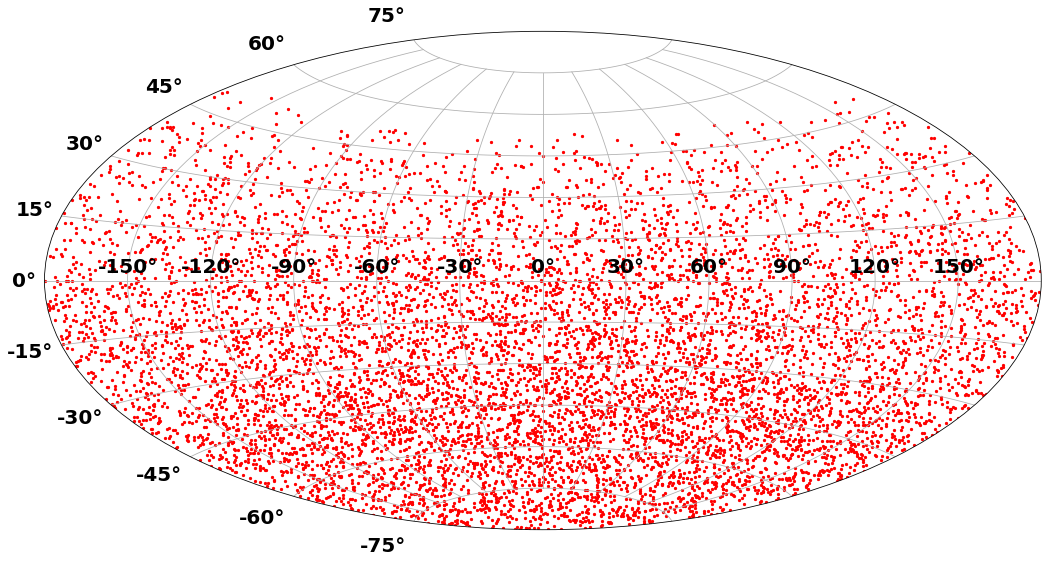

In [7]:
# ANTARES
plt.close('all')
plt.figure(figsize=(15,8))

plt.subplot(projection='aitoff')
plt.grid(True)
plt.scatter(antares.ra.wrap_at('180d').radian, antares.dec.radian, s=5, c='red')

plt.tight_layout()
plt.savefig("ANTARES.pdf")
plt.show()

## DIstribuciones de Ascensión Recta de los datos

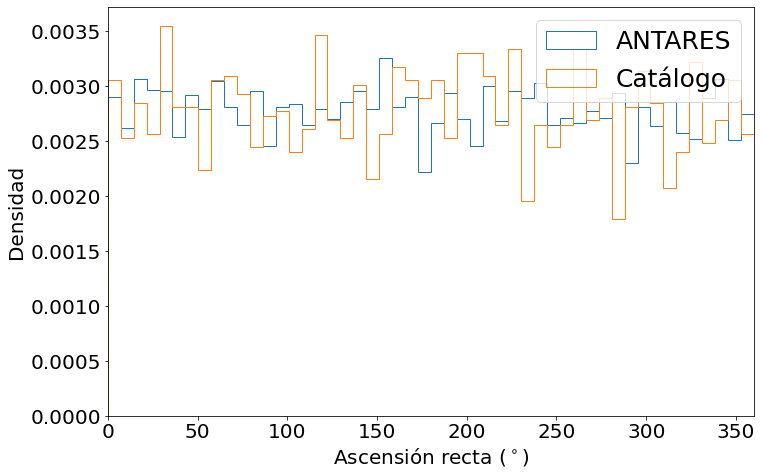

In [8]:
plt.rcParams.update({'font.weight':500})
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(antares.ra.to_value(), 
         bins = 50, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         label='ANTARES')

plt.hist(cat.ra.to_value(), 
         bins = 50, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         label='Catálogo')

plt.xlim(0,360)
plt.xlabel(r'Ascensión recta ($^\circ$)')
plt.ylabel(r'Densidad')
plt.legend(loc='upper right', fontsize = 25)
#plt.grid()
plt.tight_layout()

plt.savefig("ra.pdf")
plt.show()

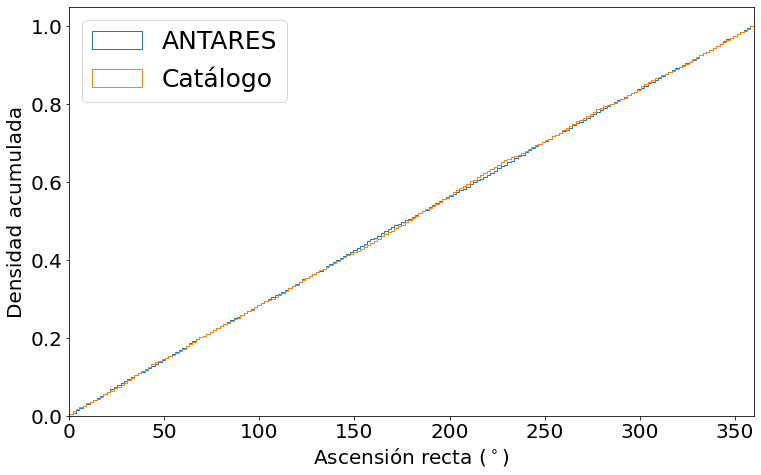

In [9]:
# Distribucion acumulada
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(antares.ra.to_value(), 
         bins = bins, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         cumulative=True, 
         label='ANTARES')

plt.hist(cat.ra.to_value(), 
         bins = bins, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         cumulative=True, 
         label='Catálogo')

plt.xlim(0,360)
plt.xlabel(r'Ascensión recta ($^\circ$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper left', fontsize = 25)
#plt.grid()
plt.tight_layout()

plt.savefig("ra_acumulada.pdf")
plt.show()

## DIstribuciones de Declinación de los datos

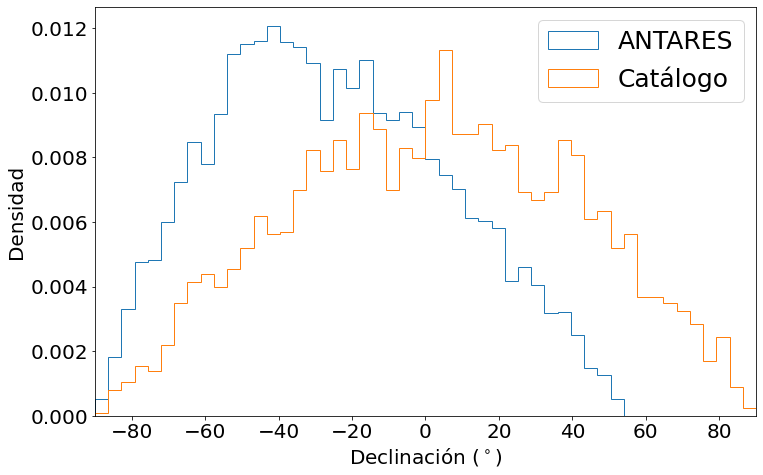

In [10]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(antares.dec.to_value(), 
         bins = 50, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         label='ANTARES')

plt.hist(cat.dec.to_value(), 
         bins = 50, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         label='Catálogo')

plt.xlim(-90,90)
plt.xlabel(r'Declinación ($^\circ$)')
plt.ylabel(r'Densidad')
plt.legend(loc='upper right', fontsize = 25)
plt.tight_layout()

plt.savefig("dec.pdf")
plt.show()

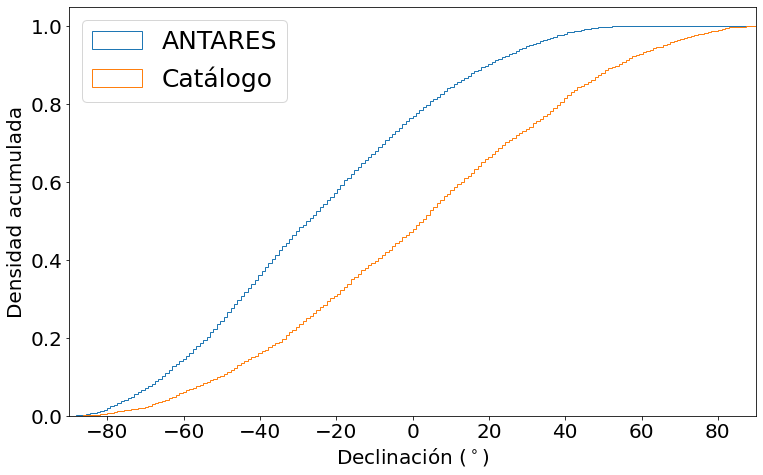

In [11]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(antares.dec.to_value(), 
         bins = bins, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         cumulative = True,
         label='ANTARES')

plt.hist(cat.dec.to_value(), 
         bins = bins, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         cumulative = True,
         label='Catálogo')

plt.xlim(-90,90)
plt.xlabel(r'Declinación ($^\circ$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.savefig("dec_acumulada.pdf")
plt.show()

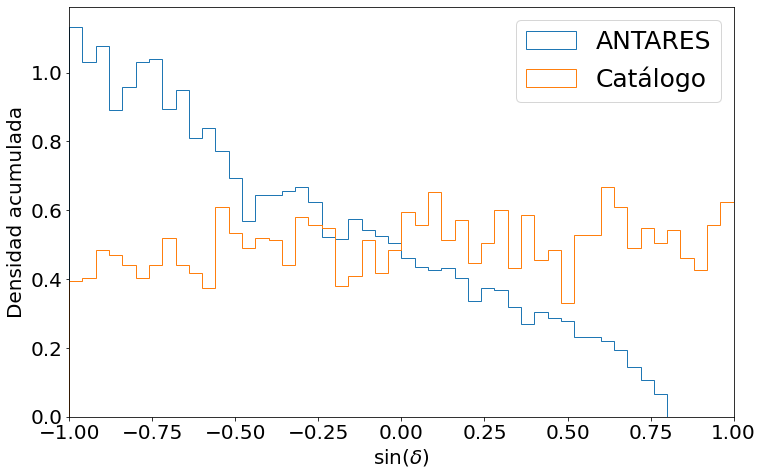

In [12]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(np.sin(antares.dec.radian), 
         bins = 50, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = False, 
         label='ANTARES')

plt.hist(np.sin(cat.dec.radian), 
         bins = 50, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = False, 
         label='Catálogo')

plt.xlim(-1,1)
plt.xlabel(r'sin($\delta$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper right', fontsize = 25)
plt.tight_layout()

plt.savefig("sin_dec.pdf")
plt.show()

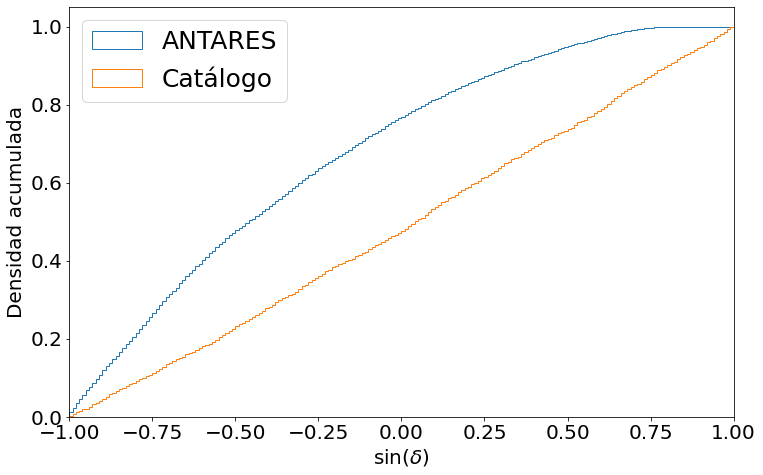

In [13]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(np.sin(antares.dec.radian), 
         bins = bins, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = True, 
         label='ANTARES')

plt.hist(np.sin(cat.dec.radian), 
         bins = bins, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = True, 
         label='Catálogo')

plt.xlim(-1,1)
plt.xlabel(r'sin($\delta$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.savefig("sin_acumulada_dec.pdf")
plt.show()

## Saco la distribución característica de la Declinación de los datos de ANTARES para poder simular pseudo-experimentos con esa distribución

In [14]:
ant_dec_hist = np.histogram(antares.dec.to_value(), bins=bins, range = (-90,90))
ant_dec_pdf = scipy.stats.rv_histogram(ant_dec_hist)

## Dibujo la declinación de un pseudo-experimento con esa distribución para comprobar que sale lo que se espera

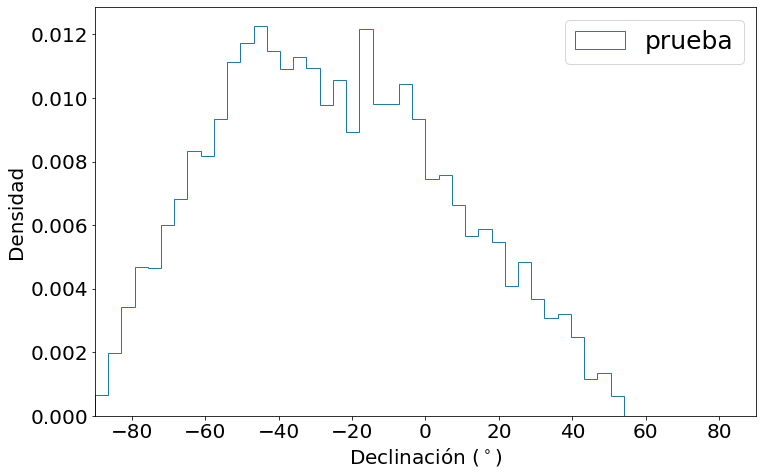

In [15]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(ant_dec_pdf.rvs(size = len(antares)),
         bins = 50, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         label='prueba')

plt.xlim(-90,90)
plt.xlabel(r'Declinación ($^\circ$)')
plt.ylabel(r'Densidad')
plt.legend(loc='upper right', fontsize = 25)
plt.tight_layout()

plt.show()

## Calculo las distancias con _search around sky_ entre los puntos del catálogo y los de ANTARES

Sólo son necesarias las distancias cortas, de modo que pongo un límite de 5º para ahorrar tiempo y potencia de cálculo. 

In [16]:
max_dist = 5.0
dist_ant_cat = (astropy.coordinates.search_around_sky(antares,cat,max_dist*astropy.units.deg))[2]

## Dibujo el histograma de distancias

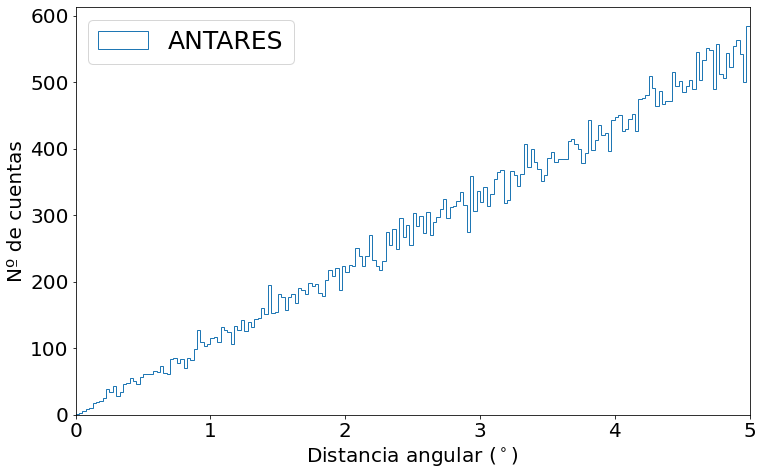

In [17]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(dist_ant_cat.deg, 
         bins = bins, 
         range=(0,max_dist), 
         histtype='step', 
         cumulative = False, 
         label='ANTARES')

plt.xlim(0,max_dist)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Nº de cuentas')

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.savefig("dist_antares.pdf")
plt.show()

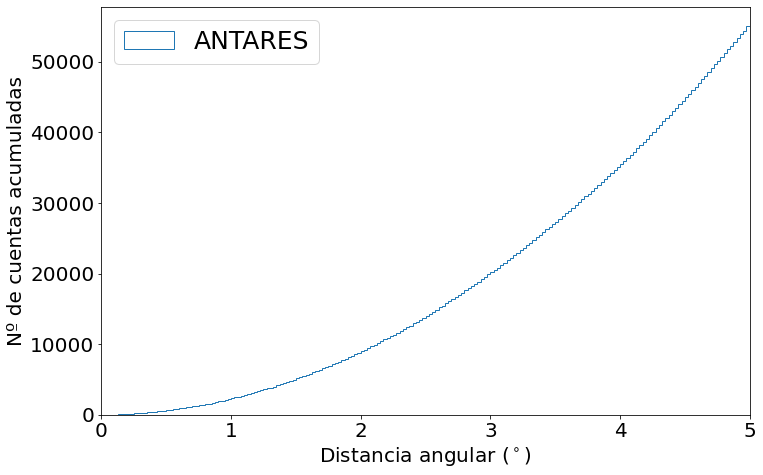

In [18]:
# Acumulado
plt.close('all')
plt.figure(figsize=(11,7))

# Estos son los valores que usaremos para calcular los residuos
ant_bins = plt.hist(dist_ant_cat.deg, 
                    bins = bins, 
                    range=(0,max_dist), 
                    histtype='step', 
                    cumulative = True, 
                    label='ANTARES')

plt.xlim(0,max_dist)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Nº de cuentas acumuladas')

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.savefig("dist_antares_acumulada.pdf")
plt.show()

## Genero los pseudo-experimentos, si no lo he hecho antes

Tengo que generarlos, calcular la distancia, y hacer el histograma.

In [19]:
if not SIMULATED:
    
    t = time.time()
    hist_random = np.zeros(bins, int)
    
    for i in range(Nexp):
        # Genero los datos de un pseudo-experimento, del mismo tamanyo que los datos de ANTARES
        ra = np.random.rand(len(antares))*360.0
        dec = ant_dec_pdf.rvs(size = len(antares))
        exp = astropy.coordinates.SkyCoord(ra*astropy.units.deg, dec*astropy.units.deg)
        
        #Calculo la distancia
        dist_random = astropy.coordinates.search_around_sky(exp,cat,max_dist*astropy.units.deg)[2].deg
        
        # Hago el histograma con la distancia
        hist_random += np.histogram(dist_random, bins = bins, range=(0,max_dist))[0]
    
    # Normalizo al numero de experimentos
    hist_random = hist_random/Nexp
    # Calculo el histograma acumulado, que es el que usaremos para el calculo de los residuos
    hist_random_cum = np.cumsum(hist_random)
    print('Time:', timedelta(seconds=time.time()-t), '\n')
    
    # Guardo los datos para cargarlos en otro momento
    with h5py.File('randon_dist.h5', 'w') as f:
        f.create_dataset('hist_random',data = hist_random)
        f.create_dataset('Nexp', data = Nexp)

else:
    # Leo los datos si ya he realizado las simulaciones
    with h5py.File('randon_dist.h5', 'r') as f:
        hist_random = f['hist_random'][...]
        Nexp = f['Nexp'][...]
    hist_random_cum = np.cumsum(hist_random)

## Dibujo la distribución normal y acumuladad de las distancias entre el catálogo y los pseudo-experimentos

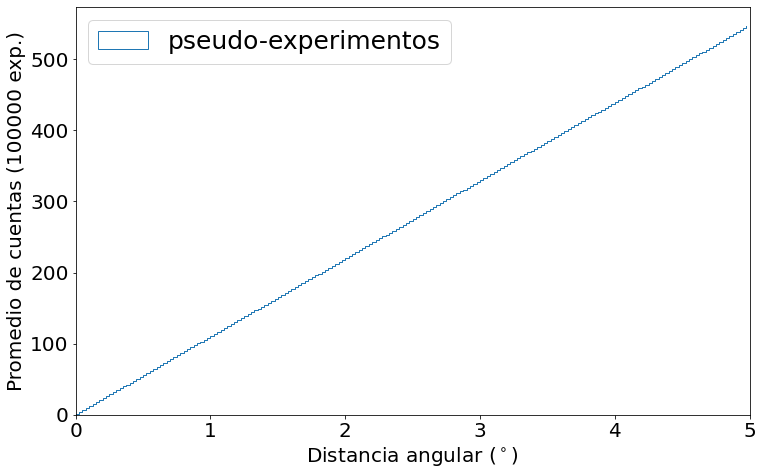

In [20]:
plt.close('all')
plt.figure(figsize=(11,7))

# Para las distancias, obtengo el punto medio de los bines ( (punto final + punto inicial) / 2.0 )
distancias = (ant_bins[1][:-1]+ant_bins[1][1:])/2.0

width = ant_bins[1][1]-ant_bins[1][0]

plt.step(ant_bins[1][:-1],
         hist_random,
         where='post',
         lw = 1.0)

plt.bar(ant_bins[1][0],
        hist_random[0],
        fill = False,
        ec = 'C0',
        width = 0.0,
        label='pseudo-experimentos')

plt.xlim(0,max_dist)
plt.ylim(0)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Promedio de cuentas ({} exp.)'.format(Nexp))

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.savefig("dist_exp.pdf")
plt.show()

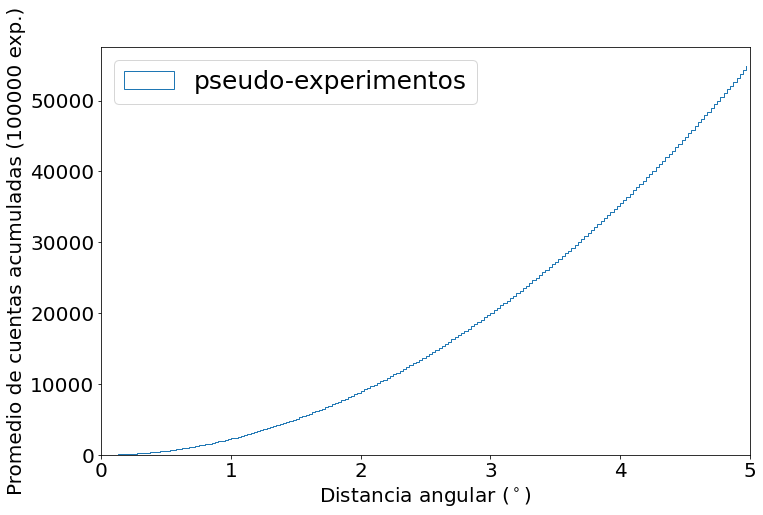

In [21]:
plt.close('all')
plt.figure(figsize=(11,7))

# Para las distancias, obtengo el punto medio de los bines ( (punto final + punto inicial) / 2.0 )
distancias = (ant_bins[1][:-1]+ant_bins[1][1:])/2.0

width = ant_bins[1][1]-ant_bins[1][0]

plt.step(ant_bins[1][:-1],
         hist_random_cum,
         where='post',
         lw = 1.0)

plt.bar(ant_bins[1][0],
        hist_random[0],
        fill = False,
        ec = 'C0',
        width = 0.0,
        label='pseudo-experimentos')

plt.xlim(0,max_dist)
plt.ylim(0)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Promedio de cuentas acumuladas ({} exp.)'.format(Nexp))

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.savefig("dist_exp_acumulada.pdf")
plt.show()

## Calculo de los residuos y significancias

In [22]:
residuos = ant_bins[0]-hist_random_cum
significancias = residuos/hist_random_cum

# Para las distancias, obtengo el punto medio de los bines ( (punto final + punto inicial) / 2.0 )
distancias = (ant_bins[1][:-1]+ant_bins[1][1:])/2.0

## Dibujo los Residuos

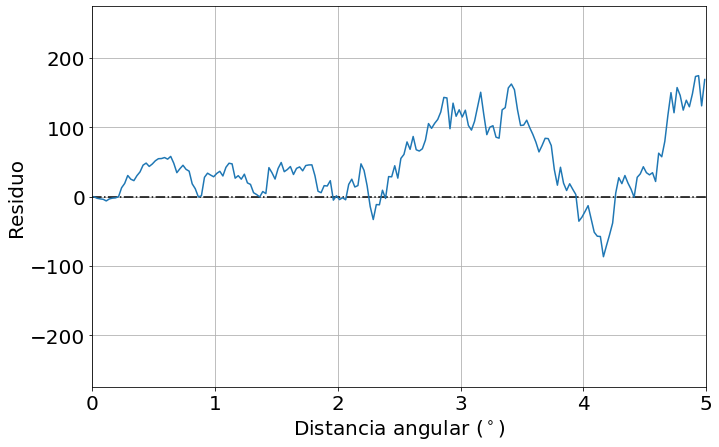

In [23]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.plot(distancias,residuos)
plt.hlines(0, 0, max_dist, linestyles='dashdot', color='black')

plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Residuo')

maximo = max(abs(residuos))

plt.xlim(0,max_dist)
plt.ylim(-maximo-100,maximo+100)
plt.grid()

plt.savefig("residuo.pdf")
plt.show()

# Dibujo las significancias

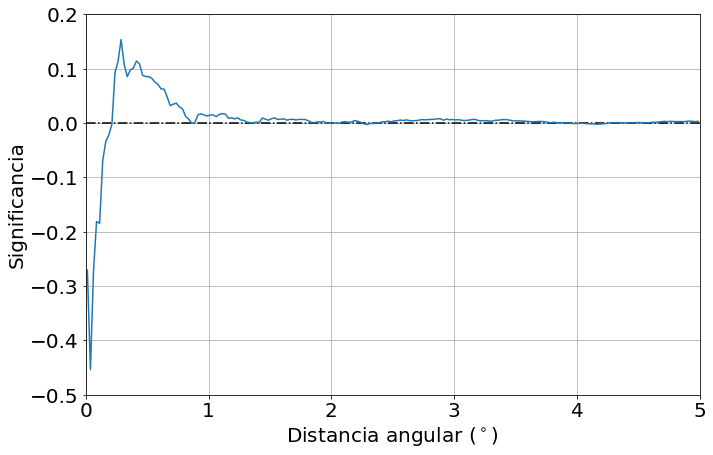

In [24]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.plot(distancias,significancias)
plt.hlines(0, 0, max_dist, linestyles='dashdot', color='black')

plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Significancia')

plt.xlim(0,max_dist)
plt.ylim(-0.5,0.2)
plt.grid()

plt.savefig("significancia.pdf")
plt.show()

## Ahora nos interesa comprobar qué probabilidad hay de obtener una cierta significancia cada bin de distancia angular.

De esta forma, podremos decir si los valores obtenidos muestran o no una correlación. Con este fin, simulamos de nuevo 100.000 pseudo-experimentos y utilizamos cada uno de ellos como si fueran los datos de ANTARES. Así, podemos calcular las significancias para cada uno de ellos, de modo que tendremos una distribución de significancias para cada bin de distancia. Esta distribución nos permitirá ver a qué nivel de Sigma se encuentra el valor de la significancia para cada bin.

### Genero nuevos pseudo-experimentos, o los cargo si ya están hechos

In [25]:
if not SIMULATED2:
    
    t = time.time()
    new_hist_random = np.zeros((nexp,bins), int)
    
    for i in range(nexp):
        # Genero los datos
        ra = np.random.rand(len(antares))*360.0
        dec = ant_dec_pdf.rvs(size = len(antares))
        exp = astropy.coordinates.SkyCoord(ra*astropy.units.deg, dec*astropy.units.deg)
        
        #Calculo la distancia
        dist_random = astropy.coordinates.search_around_sky(exp,cat,max_dist*astropy.units.deg)[2].deg
        
        # Hago el histograma con la distancia
        new_hist_random[i] += np.histogram(dist_random, bins = bins, range=(0,max_dist))[0]
    
    new_hist_random_cum = np.cumsum(new_hist_random,axis=1)
    print('Time:', timedelta(seconds=time.time()-t), '\n')
    
    # Guardo los datos para cargarlos en otro momento
    with h5py.File('new_randon_dist.h5', 'w') as f:
        f.create_dataset('new_hist_random',data = new_hist_random)
        f.create_dataset('nexp', data = nexp)
else:
    
    with h5py.File('new_randon_dist.h5', 'r') as f:
        new_hist_random = f['new_hist_random'][...]
        nexp = f['nexp'][...]
    new_hist_random_cum = np.cumsum(new_hist_random,axis=1)

## Calculo los nuevos residuos y significancias

In [26]:
new_residuos = new_hist_random_cum-hist_random_cum
new_significancias = new_residuos/hist_random_cum

## Ejemplos de distribución de significancias

Podemos ver algunos ejemplos de cómo han quedado las distribuciones de las significancias. Para valores bajos de la distancia angular ($<0.3^\circ$) vemos que no tenemos mucha estadística, por lo que las grandes fluctuaciones son normales y poco significativas. Para valores algo mayores la distribución es totalmente gaussiana con suficiente estadística como para sacar buenas conclusiones de ellas.

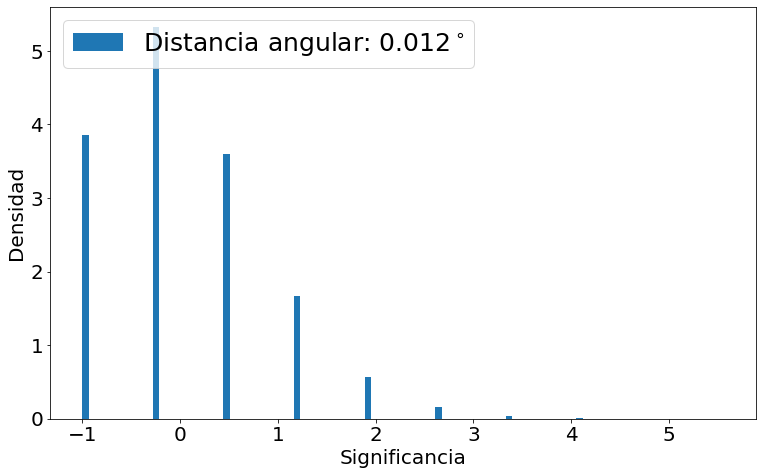

In [27]:
plt.close('all')
plt.figure(figsize=(11,7))

i = 0
plt.hist(new_significancias[:,i],
         bins = 100,
         density = True,
         label="Distancia angular: "+str(round(distancias[i],3))+"$^\circ$")

plt.xlabel(r'Significancia')
plt.ylabel(r'Densidad')

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()
plt.savefig("dist_significancias_low.pdf")

plt.show()

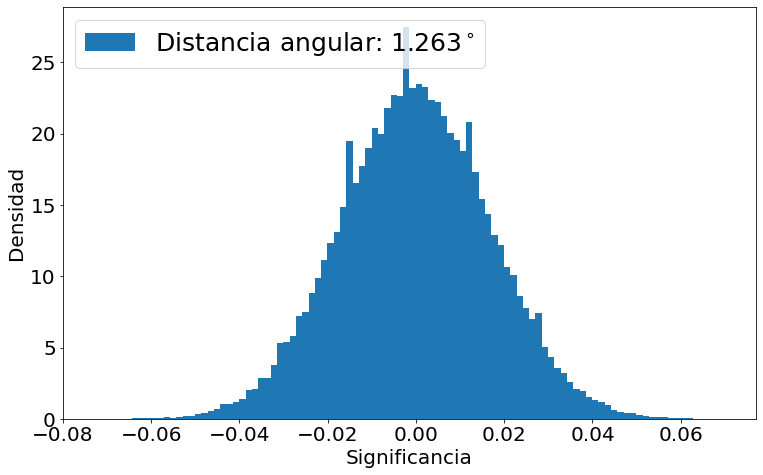

In [28]:
plt.close('all')
plt.figure(figsize=(11,7))

i = 50
plt.hist(new_significancias[:,i],
         bins = 100,
         density = True,
         label="Distancia angular: "+str(round(distancias[i],3))+"$^\circ$")

plt.xlabel(r'Significancia')
plt.ylabel(r'Densidad')

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()
plt.savefig('dist_significancias.pdf')

plt.show()

## Con esto puedo dibujar sobre la figura de las significancias las bandas de sigmas

Aunque para las distancias más pequeñas no se cumple, podemos suponer en general que las significancias se distribuyen como Gaussianas

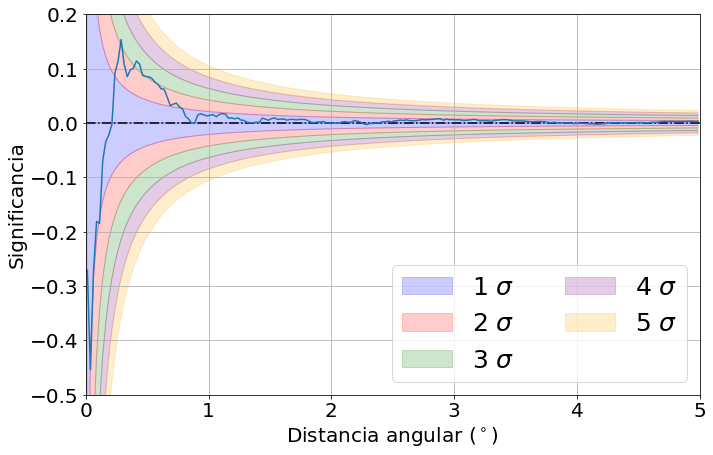

In [29]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.plot(distancias,significancias)

# Percentiles equivalentes a las sigmas de una Gaussiana
std = np.std(new_significancias, axis=0)
colors = ['blue', 'red', 'green', 'purple', 'orange']

for i,c in enumerate(colors):
    plt.fill_between(distancias, std*i, std*(i+1), alpha = 0.2, color = c, label=str(i+1)+" $\sigma$")
    plt.fill_between(distancias, -std*i, -std*(i+1), alpha = 0.2, color = c)
plt.hlines(0, 0, max_dist, linestyles='dashdot', color='black')

plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Significancia')

plt.xlim(0,max_dist)
plt.ylim(-0.5,0.2)
plt.legend(loc='lower right', fontsize = 25, ncol=2)
plt.grid()

plt.savefig("significancia_percentiles.pdf")
plt.show()

## También puedo transformar los valores de la significancia en sigmas

Max. significancia: 2.28 sigmas.


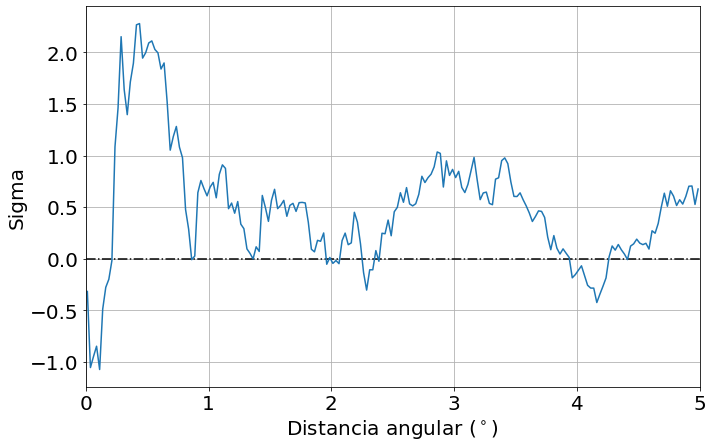

In [30]:
sigma_ant = (significancias-np.mean(new_significancias, axis=0))/np.std(new_significancias, axis=0)

print('Max. significancia:', round(np.max(sigma_ant),2), 'sigmas.')

plt.close('all')
plt.figure(figsize=(11,7))

plt.plot(distancias, sigma_ant)

plt.hlines(0, 0, max_dist, linestyles='dashdot', color='black')

plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Sigma')

plt.xlim(0,max_dist)
#plt.ylim(-1,1)
plt.grid()

plt.savefig("sigma.pdf")
plt.show()

# Saco el máximo valor de significancia (en valor de sigma) para cada pseudo-experimento y hago un histograma para la corrección _post trial_

In [31]:
sigma = (new_significancias-np.mean(new_significancias, axis=0))/np.std(new_significancias, axis=0)
max_sigma = np.max(sigma, axis=1)
sigma_post = (np.max(sigma_ant)-np.mean(max_sigma))/np.std(max_sigma)
print('Desviación post-trial:', round(sigma_post, 4))

Desviación post-trial: 0.7757


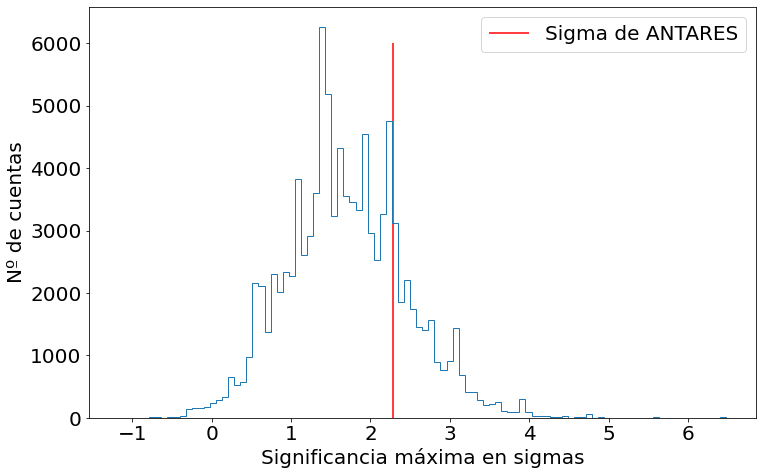

In [32]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.hist(max_sigma, 
        bins = 100,
        density=False,
        #range=(0,max_dist), 
        histtype='step')

plt.vlines(np.max(sigma_ant), 0, 6000, color = 'red' ,label = 'Sigma de ANTARES')

#plt.xlim(0,max_dist)
plt.xlabel(r'Significancia máxima en sigmas')
plt.ylabel(r'Nº de cuentas')
plt.legend()

plt.tight_layout()
plt.savefig("max_sigma.pdf")
plt.show()